Hola David!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd# importar librerías
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as pltpyplot

In [2]:
instacart = pd.read_csv("/datasets/instacart_orders.csv", sep = ";")
products = pd.read_csv("/datasets/products.csv", sep = ";")
aisles = pd.read_csv("/datasets/aisles.csv", sep = ";")
departments = pd.read_csv("/datasets/departments.csv", sep = ";")
order_products = pd.read_csv("/datasets/order_products.csv", sep = ";") # leer conjuntos de datos en los DataFrames

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo importando las librerías y cargando tus datos en celdas diferentes
</div>

In [3]:
instacart.info()
instacart.head()
instacart.describe() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [4]:
products.info()
products.head()
products.describe()
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [5]:
aisles.info()
aisles.head()
aisles.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [6]:
departments.info()
departments.head()
departments.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [7]:
order_products.info()
order_products.head()
order_products.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la exploración inicial de tus datos. Te recomiendo también agregar `.describe()` para que tengas más conocimiento de los datos que manejarás. Además, no es necesario que uses print cuando muestres el resultado de un DataFrame, de hecho le quitas la capacidad al notebook te mostrarte el resultado como una tabla por lo que te recomendaría en lugar de usar print lo cambies por `display()` y esto lo puedes aplicar al resto del notebook 
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

-Para la hoja de información de instacart, se tienen 478,967 datos, donde cada uno corresponde a un pedido, todas sus filas son numeros enteros, a excepcion de days_since_prior_order que viene delimitado como un numero decimal.

-En el caso de la hoja products, se tienen 49,694 donde cada dato corresponde a un producto que pueden comprar, todas sus columnas contienen valores enteros sin contar product_name, que contiene cadenas de texto.

-En la hoja aisles, tenemos 134 datos, donde cada uno corresponde al número ID que identifica de manera única cada categoría de pasillo de víveres, solo contiene una cadena de texto, la cual es aisle y una columna con valores enteros que es aisle_id.

-Para la hoja de departments, tenemos 21 datos, en donde cada dato es un número ID que identifica de manera única cada departamento de víveres, contiene una columna de valores enteros y una collumna de valores como string.

-Por último, order_products cuenta con 4,545,007 datos, en donde cada uno indica un artículo pedido en un pedido, contiene solamente columnas con valores enteros, salvo add_to_cart_order que contiene decimales.

Cada una de las hojas viene delimitado por ;

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
instacart_dup = instacart[instacart.duplicated()]

instacart_dupsum = instacart.duplicated().sum()

instacart_na = instacart.isna().sum()

display(f"Hay {instacart_dupsum} filas duplicadas.")
display()
display(f"Hay {instacart_na} filas con valores na.")
display()
display(instacart_dup)

'Hay 15 filas duplicadas.'

'Hay order_id                      0\nuser_id                       0\norder_number                  0\norder_dow                     0\norder_hour_of_day             0\ndays_since_prior_order    28819\ndtype: int64 filas con valores na.'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí, se tienen 15 líneas duplicadas, las cuales tienen el día de la semana y la hora en la que se hizo el pedido como valores identicos.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart_filtro = instacart[(instacart["order_dow"] == 3) & (instacart["order_hour_of_day"] == 2)]
display(instacart_filtro.count())

order_id                  121
user_id                   121
order_number              121
order_dow                 121
order_hour_of_day         121
days_since_prior_order    114
dtype: int64

¿Qué sugiere este resultado?
Que se tienen 121 pedidos que fueron llevados a cabo el miercoles a las 2 am.

In [10]:
# Elimina los pedidos duplicados
instacart = instacart.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
display(instacart.duplicated().sum())

0

In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
instacart_filtro = instacart[(instacart["order_dow"] == 3) & (instacart["order_hour_of_day"] == 2)]
display(instacart_filtro.count())
display()
display(instacart_filtro.isna().sum())

order_id                  106
user_id                   106
order_number              106
order_dow                 106
order_hour_of_day         106
days_since_prior_order    101
dtype: int64

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    5
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado y la revisión de duplicados!
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos
Despues de haber verificado por valores duplicados, al ser exactamente las mismas filas, se opto por eliminarlos, siendo los valores duplicados solamente pedidos que se llevaron a cabo el meircoles a las 2 am. Ademas de ello, se tinen 7 pedidos que fueron llevados sin llevar acabo un conteo de la ultima vez que se realizó una orden.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products_dup = products[products.duplicated()]

products_dupsum = products.duplicated().sum()

products_na = products.isna().sum()

display(f"Hay {products_dupsum} filas duplicadas.")
display()
display(f"Hay {products_na} filas con valores na.")
display()
display(products_dup)

'Hay 0 filas duplicadas.'

'Hay product_id          0\nproduct_name     1258\naisle_id            0\ndepartment_id       0\ndtype: int64 filas con valores na.'

,product_id,product_name,aisle_id,department_id


In [14]:
# Verifica si hay IDs duplicadas de productos
display(products["product_id"].duplicated().sum())

0

In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"] = products["product_name"].str.upper()

display(products["product_name"].duplicated().sum())


1361

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la transformación a mayúsculas, aunque te recomendaría que lo apliques y guardes sobre la misma columna de product_name para que el resto de tus cálculos no se vean afectados por las minúsculas en los nombres
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las correcciones!
</div>

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
display(products["aisle_id"].duplicated().sum())

49560

Describe brevemente tus hallazgos y lo que hiciste con ellos.
En un principio vemos que no contamos con filas totalmente duplicadas.
Para la varable product_id, no se tienen duplicados, mientras que para product_name se tienen 1,361 duplicados.
En el caso de productos no faltantes no me quedo muy claro que es lo que se tenia que observar, espero puedan guiarme para mejorar el script.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments_dup = departments[departments.duplicated()]

departments_dupsum = departments.duplicated().sum()

departments_na = departments.isna().sum()

display(f"Hay {departments_dupsum} filas duplicadas.")
display()
display(f"Hay {departments_na} filas con valores na.")
display()
display(departments_dup)

'Hay 0 filas duplicadas.'

'Hay department_id    0\ndepartment       0\ndtype: int64 filas con valores na.'

,department_id,department


In [18]:
# Revisa si hay IDs duplicadas de productos
display(departments["department_id"].duplicated().sum())

0

Describe brevemente tus hallazgos y lo que hiciste con ellos. En el caso de departments, no cuenta con filas o id duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles_dup = aisles[aisles.duplicated()]

aisles_dupsum = aisles.duplicated().sum()

aisles_na = aisles.isna().sum()

display(f"Hay {aisles_dupsum} filas duplicadas.")
display()
display(f"Hay {aisles_na} filas con valores na.")
display()
display(aisles_dup)

'Hay 0 filas duplicadas.'

'Hay aisle_id    0\naisle       0\ndtype: int64 filas con valores na.'

,aisle_id,aisle


In [20]:
# Revisa si hay IDs duplicadas de productos
display(aisles["aisle_id"].duplicated().sum())

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al igual que departments, aisles no cuenta con filas o id duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products_dup = order_products[order_products.duplicated()]

order_products_dupsum = order_products.duplicated().sum()

order_products_na = order_products.isna().sum()

display(f"Hay {order_products_dupsum} filas duplicadas.")
display()
display(f"Hay {order_products_na} filas con valores na.")
display()
display(order_products_dup)

'Hay 0 filas duplicadas.'

'Hay order_id               0\nproduct_id             0\nadd_to_cart_order    836\nreordered              0\ndtype: int64 filas con valores na.'

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
display(order_products["order_id"].duplicated().sum())

4094961

Describe brevemente tus hallazgos y lo que hiciste con ellos. Para order_products, no se tienen filas completamente iguales, pero se tienen order_id duplicados, esto puede deberse a que en un mismo pedido se tienen diversos productos, por lo que al identificar cada producto individual, se le asigna el mismo id a varios pedidos que se pidieron al mismo tiempo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando estos últimos datasets!
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

nan_products = products[products["product_name"].isna()]

display(nan_products)


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos. Todos los pedidos faltantes tienen el mismo numero de pasillo y departamento.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
display(nan_products[nan_products["aisle_id"]==100].count())

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

Describe brevemente cuáles son tus hallazgos. Es correcto, todos los productos ausentes tienen el mismo número de pasillo.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
display(nan_products[nan_products["department_id"]==21].count())

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

Describe brevemente cuáles son tus hallazgos. Es correcto, todos los productos ausentes tienen el mismo número de departamento.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

De la forma en la que lo haces en las dos celdas anteriores no es la más adecuada por que de los 1258 filas solo estás mostrando 10 y esto en otros casos puede llevar a deducciones erroneas, te recomiendo que hagas un filtro para los ID correspondientes y verifiques si siguen apareciendo las 1258 filas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios!
</div>

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
departments_100 = departments[departments["department_id"] == 21]

display(departments_100)

display()

aisles_21 = aisles[aisles["aisle_id"] == 100]

display(aisles_21)

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos. Como tall no se tiene un pasillo con ID de 100 o un departamento con ID de 21, esos numeros se asignan a pedidos perdidos, por lo cual, todos los productosfaltates son productos que se perdieron.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Aplicaste los filtros correctos sobre los datasets correctos
</div>

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")

Describe brevemente tus hallazgos y lo que hiciste con ellos. Al observar que los datos en blanco son por objetos perdidos, se procedio a rellenarlos con "Unknown", ya que en si es un pedido que se realizo pero no se entrego correctamente.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
instacart_na = instacart[instacart.isna()]
print(instacart_na)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0            NaN      NaN           NaN        NaN                NaN   
1            NaN      NaN           NaN        NaN                NaN   
2            NaN      NaN           NaN        NaN                NaN   
3            NaN      NaN           NaN        NaN                NaN   
4            NaN      NaN           NaN        NaN                NaN   
...          ...      ...           ...        ...                ...   
478962       NaN      NaN           NaN        NaN                NaN   
478963       NaN      NaN           NaN        NaN                NaN   
478964       NaN      NaN           NaN        NaN                NaN   
478965       NaN      NaN           NaN        NaN                NaN   
478966       NaN      NaN           NaN        NaN                NaN   

        days_since_prior_order  
0                          NaN  
1                          NaN  
2                       

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#En si no, ya que no podemos observar que numero de pedido es, porque no viene información, se pudiera considerar que los
#pedidos con Nan son los registros de los clientes por primera vez, por lo que se opta por eliminar dichas observaciones.

instacart = instacart.dropna()

display(instacart.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes

order_products_na = order_products[order_products.isna()]
display(order_products_na)

,order_id,product_id,add_to_cart_order,reordered
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
4545002,NaN,NaN,NaN,NaN
4545003,NaN,NaN,NaN,NaN
4545004,NaN,NaN,NaN,NaN
4545005,NaN,NaN,NaN,NaN


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
display("El valor minimo es:", min(order_products["add_to_cart_order"]))

display()

display("El valor maximo es:", max(order_products["add_to_cart_order"]))

'El valor minimo es:'

1.0

'El valor maximo es:'

64.0

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La columna a la que se refiere el enunciado es la de `add_to_cart_order` donde debes obtener el máximo y mínimo
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto!
</div>

Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_products_filtro = order_products[order_products["add_to_cart_order"].isna()]

display(order_products_filtro)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?


#Filtro de acuerdo a order id de mi variable filtrada
order_absent = order_products[order_products["order_id"].isin(order_products_filtro["order_id"])]

#agrupo de acuerdo a order id y procedo a contar cada argumento
absent_counts = order_absent.groupby("order_id")["product_id"].count()

display(absent_counts)

#me aseguro con un filtro de que todos los pedidos con valores ausentes contengan mas de 64 productos
display(absent_counts[absent_counts > 64].count())





order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

70

Describe brevemente cuáles son tus hallazgos.
Todos los datos nan tienen add_to_cart_order en cero, es decir, que es el primer articulo que se añade pero al ser un valor nan, podemos catalogarlo como el registro del cliente solamente, no del pedido.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para revisar si los pedidos con valores ausentes tienen o no más de 64 pedidos te recomiendo usar las order_id que tienes en tu variable `order_products_filtro` (Solo toma los valores de la columna order_id) y filtrar en el dataset original utilizando `isin()` y luego si agrupar por order_id y contar en product_id, ya que de la forma en que lo estás haciendo solo cuenta cuantos valores ausentes hay por órden pero puede que tengas órdenes que tiene valores ausentes y también valores que no lo son y lo que interesa es contar todos estos datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo!
</div>

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype("int")

display(order_products["add_to_cart_order"])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
display("valor minimo de hora:", instacart["order_hour_of_day"].min())
display()
display("valor máximo de hora:", instacart["order_hour_of_day"].max())
display()
display("valor minimo de día:", instacart["order_dow"].min())
display()
display("valor máximo de día:", instacart["order_dow"].max())

'valor minimo de hora:'

0

'valor máximo de hora:'

23

'valor minimo de día:'

0

'valor máximo de día:'

6

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo, otra forma en la que podías ver los valores en estas columnas era aplicando `.unique()` sobre las mismas
</div>

In [ ]:
instacart.plot(title = "Número de personas que realizan pedidos en cada hora",
              kind = "bar",
              x = "order_hour_of_day",
              y = "user_id",
              )

instacart.plot(title = "Número de personas que realizan pedidos en cada día",
              kind = "bar",
              x = "order_dow",
              y = "user_id",
              )

instacart.plot(title = "Tiempo que tarda la gente en hacer su siguiente pedido",
              kind = "bar",
              x = "days_since_prior_order",
              y = "user_id",
              )

In [ ]:
instacart.head()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El código que estás usando en esta sección está haciendo cálculos que demandan mucha CPU por lo que el kernel se reinicia, te recomiendo que si no estás usando estas visualizaciones las descartes del notebook o que realices los cálculos de primero y luego solo muestres la gráfica en base a esos cálculos
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:xlabel='hora del dia', ylabel='Pedidos por hora'>

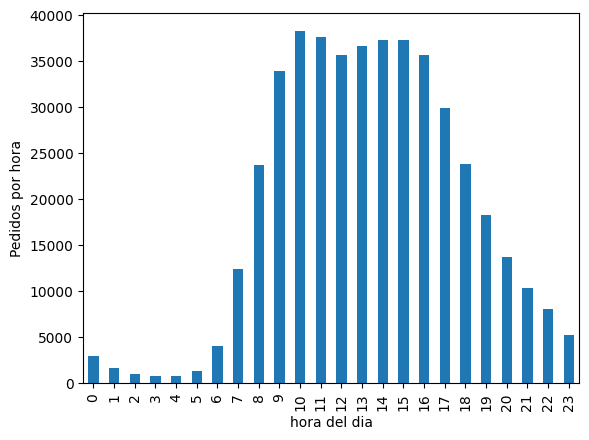

In [36]:
order_hour = instacart.groupby("order_hour_of_day")["order_id"].count()

order_hour.plot(kind = "bar", xlabel = "hora del dia", ylabel = "Pedidos por hora")


Escribe aquí tus conclusiones: a las 10 de la mañana, es la hora en donde mas pedidos se realizan, mientras que a las 4 de la mañana es la hhora con menor pedidos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Es mejor mostrar los resultados con una gráfica de barras para cada hora
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:xlabel='días de la semana', ylabel='pedidos por dia'>

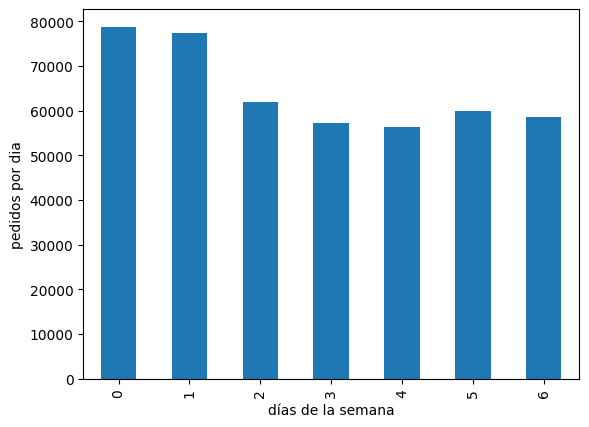

In [37]:
order_day = instacart.groupby("order_dow")["order_id"].count()

order_day.plot(kind = "bar", xlabel = "días de la semana", ylabel = "pedidos por dia")

Escribe aquí tus conclusiones: Los domingos es cuando mas gente realiza pedidos, mientras que los jueves son los días con menores pedidos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Al igual que el ejercicio anterior, es mejor mostrar los resultados con una gráfica de barras para cada día
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Lo mínimo que transcurre para que alguien haga un pedido son: 0.0 días

Lo máximo que transcurre para que alguien haga un pedido son: 30.0 días


<AxesSubplot:xlabel='dias de espera por pedido', ylabel='numero de pedidos'>

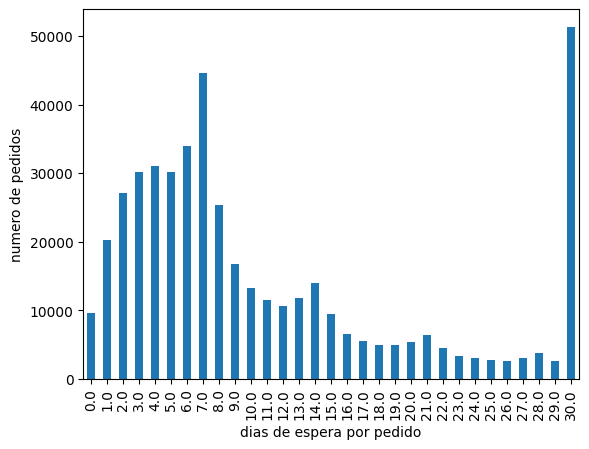

In [38]:
order_since_prior = instacart.groupby("days_since_prior_order")["order_id"].count()

print("Lo mínimo que transcurre para que alguien haga un pedido son:", order_since_prior.index.min(), "días")
print()
print("Lo máximo que transcurre para que alguien haga un pedido son:", order_since_prior.index.max(), "días")

order_since_prior.plot(kind = "bar", xlabel = "dias de espera por pedido", ylabel = "numero de pedidos")

Escribe aquí tus conclusiones

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí también puedes agregar una gráfica de barras para complementar tus respuestas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Siempre es mejor ilustrar los análisis con gráficas
    
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
order_3 = instacart[instacart["order_dow"] == 3]
order_3.groupby("order_dow")["order_hour_of_day"].plot(kind = "bar")

pltpyplot.title("Pedidos realizados en miercoles")
pltpyplot.show()

In [ ]:
order_6 = instacart[instacart["order_dow"] == 6]
order_6.groupby("order_dow")["order_hour_of_day"].plot(kind = "bar")
pltpyplot.title("Pedidos realizados en sábado")
pltpyplot.show()

In [ ]:
instacart[instacart["order_dow"] == 3]["order_hour_of_day"].plot(kind = "bar", alpha = 0.5)
instacart[instacart["order_dow"] == 6]["order_hour_of_day"].plot(kind = "bar", alpha = 0.5)

In [ ]:
print("ambos días tienen casi la misma distribucion en cuanto a las horas que se llevan a cabo los pedidos")

Escribe aquí tus conclusiones

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Muy buena gráficas para poder hacer la comparación, aunque te recomendaría que en la gráfica de la celda anterior la muestres como barras en lugar de histograma
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Las barras sirven más para cuando se tiene pocos puntos en el eje x y necesitas alguna comparación
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
instacart["order_number"].plot(kind = "hist")
pltpyplot.title("Ordenes que ha realizado cada cliente")
pltpyplot.show()

In [ ]:
print("La distribucion se tiene como sesgada a la derecha, ya que se suele pedir mas las primeras veces solamente.")

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
product_counts = order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

merged_df = pd.merge(product_counts, products, on='product_id')

sorted_merge = merged_df.sort_values(by = "count", ascending = False)

top_20 = sorted_merge.head(20)

display(top_20)

top_20.groupby("product_id")["product_name"].count().plot(kind = "bar")

In [ ]:
print("la mayoria de los productos de mayor pedido pertenecen al departamento 4")

Escribe aquí tus conclusiones

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, muy buen trabajo con el cálculo! Te recomendaría mostrar una gráfica de barras para ilustrar el resultado
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
product_order = order_products.groupby("order_id")["product_id"].count().sort_values(ascending = False)

print(product_order)

In [ ]:
product_order.plot(kind = "hist")
pltpyplot.title("Cantidad de artículos que se compran por pedido")
pltpyplot.show()

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
product_order = order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

merged_df = pd.merge(product_counts, products, on='product_id')

sorted_merge = merged_df.sort_values(by = "count", ascending = False)

top_20 = sorted_merge.head(20)

print(top_20)

In [ ]:
top_20.groupby("product_id")["product_name"].count().plot(kind = "bar")

Escribe aquí tus conclusiones

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, muy buen trabajo con el cálculo! Te recomendaría mostrar una gráfica también en este caso
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
product_order = order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

merged_df = pd.merge(product_counts, products, on='product_id')

sorted_merge = merged_df.sort_values(by = "count", ascending = False)

In [ ]:
total_products = sorted_merge["count"].sum()
sorted_merge["proportion"] = sorted_merge["count"] / total_products

In [ ]:
print(sorted_merge)

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
product_order = order_products[order_products["add_to_cart_order"]==0]['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

merged_df = pd.merge(product_counts, products, on='product_id')

sorted_merge = merged_df.sort_values(by = "count", ascending = False)

In [ ]:

ordered_products = sorted_merge[sorted_merge['count'] > 0]


total_ordered_products = ordered_products['count'].sum()


ordered_products['proportion'] = ordered_products['count'] / total_ordered_products

ordered_products.head() 

Escribe aquí tus conclusiones

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Revisa el cálculo de las proporciones en los dos ejercicios anteriores ya que estás teniendo cantidades muy bajas, si bien el resultado debe estar entre 0 y 1 una proporción de 0.007 es un valor muy bajo y si analizas el valor máximo de la columna porportion verás que no pasan de a 0.1
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
product_order = order_products[order_products["add_to_cart_order"]==0]['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

merged_df = pd.merge(product_counts, products, on='product_id')

sorted_merge = merged_df.sort_values(by = "count", ascending = False)

sorted_merge.groupby("product_name")["count"].count().plot(kind = "bar")

In [ ]:
sorted_merge.head(20)

Escribe aquí tus conclusiones

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, también sería buena idea aquí incluir una gráfica de barras para la comparación
</div>

### Conclusion general del proyecto:

In [ ]:
#Se que el codigo tiene algunos errores, por no decir muchos, pero creo que (o espero), haber entendido lo necesario 
#para manejar los archivos recibidos. En los datos proporcionados podemos observar que la proporcion de productos viejos 
#es muy poca, asi como que el principal departamento de dichos productos es el 4

<div class="alert alert-block alert-info">
<b>Comentario final (1ra Revision)</b> <a class=“tocSkip”></a>
    

Hiciste un buen trabajo David! Haría falta algunas correcciones donde te he dejado mis comentarios y también tus conclusiones finales del proyecto te recomendaría ser un poco más detallado en base a la interpretación de los resultados que estás mostrando, se nota tu conocimiento de las herramientas de manejo de datos cómo lo es pandas y la interpretación de los resultados. 
    

Te he ido dejando mis comentarios y recomendacines sobre algunos puntos que espero te sirvan para tu siguiente iteracion y tus próximos proyectos.
    
Adicional, te invito a que uses las celdas en formato Markdown para redactar tus interpretaciones a lo largo del notebook en lugar de usar `print` para escribirlas
    
Un saludo!
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las correcciones realizadas David! Complementaste correctamente tu proyecto incluyendo las gráficas las cuales ayudan mucho cuando tienes que comunicar algún análisis. Cómo recomendación para tus próximos proyectos es que tus conclusiones sean más detalladas y enfocadas a las diferentes cosas que se analizaron en el notebook y en como eso puede o no traer más valor a la empresa para la cual se realiza el trabajo.
</div>